# Criação de Modelos de Machine Learning

Nesta etapa o conjunto de dados foi particionado aleatoriamente entre dados de treino (70%) e de teste (30%), as variáveis categóricas foram transformadas em numéricas e foram avaliados alguns modelos baseados em um algoritmo de ensemble de árvores de decisão com aumento de gradiente (gradiente boosting) conforme alteração de hiperparâmetros. Aquele que apresentou melhor desempenho foi selecionado e foram calculadas métricas de avaliação de performance utilizando os dados de teste.

In [1]:
# Importando bibliotecas
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.externals import joblib
from xgboost import XGBRegressor, plot_importance
from database_utils import Metrics
import seaborn as sns
from matplotlib import pyplot

In [2]:
# Leitura da base de dados consolidada após etapa de processamento
df = pd.read_csv(filepath_or_buffer='df_tratado.csv', sep=';', encoding='utf-8', decimal=',')

In [3]:
# Listando variáveis explicativas qualitativas
col_list =  ['SG_UF_RESIDENCIA',
             'TP_SEXO',
             'TP_ESTADO_CIVIL',
             'TP_COR_RACA',
             'TP_NACIONALIDADE',
             'TP_ESCOLA',
             'TP_ENSINO',
             'TP_DEPENDENCIA_ADM_ESC',
             'TP_LOCALIZACAO_ESC',
             'TP_SIT_FUNC_ESC',
             'TP_LINGUA',
             'Q001',
             'Q002',
             'Q003',
             'Q004',
             'Q006',
             'Q007',
             'Q008',
             'Q009',
             'Q010',
             'Q011',
             'Q012',
             'Q013',
             'Q014',
             'Q015',
             'Q016',
             'Q017',
             'Q018',
             'Q019',
             'Q020',
             'Q021',
             'Q022',
             'Q023',
             'Q024',
             'Q025',
             'Q027']

# Garantindo que todas serão tratadas como qualitativas
for col in col_list:
    df[col] = df[col].astype(object)

In [4]:
# Transformando variáveis qualitativas em dummies e eliminando uma das categoriais a fim de eliminar multicoliearidade
df = pd.get_dummies(df, columns=col_list, prefix=col_list, drop_first=True)

In [5]:
df.head()

,NU_IDADE,Q005,NU_NOTA_TOT,IN_RENDIMENTO,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,...,Q023_B,Q024_B,Q024_C,Q024_D,Q024_E,Q025_B,Q027_B,Q027_C,Q027_D,Q027_E
0,17.0,3.0,2932.9,0.984189,0,0,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0
1,17.0,5.0,2790.0,0.984189,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
2,17.0,2.0,3090.2,0.984189,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,17.0,4.0,2908.3,0.984189,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,18.0,4.0,3365.2,0.984189,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [6]:
# Particionando a base entre dados de treino e de teste (70-30)
X = df.drop(['NU_NOTA_TOT'], axis=1)
y = df['NU_NOTA_TOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
print('Total de observações: %d' % (len(X)))
print('Total de observações na partição de treino: %d' % (len(X_train)))
print('Total de observações na partição de teste: %d' % (len(X_test)))

Total de observações: 1119954
Total de observações na partição de treino: 783967
Total de observações na partição de teste: 335987


In [8]:
# Definindo algoritmos que serão avaliados
model = XGBRegressor()

In [14]:
# Hiperparâmetros que serão testados 
hyper = {'n_estimators': [10, 30, 50, 150]}

cv_model = RandomizedSearchCV(estimator = model, param_distributions = hyper, random_state = 42)

# Ajustando o modelo
cv_model.fit(X_train,y_train)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                          objective='reg:squarederror',
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                         

In [19]:
# Visualizando os resultados da busca por hiperparâmetros
pd.set_option('max_columns', 200)
pd.DataFrame(cv_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,46.085337,3.363394,2.238247,0.206186,10,{'n_estimators': 10},0.407071,0.407677,0.409485,0.405894,0.409887,0.408003,0.001495,4
1,105.451623,2.837880,2.346806,0.339808,30,{'n_estimators': 30},0.455480,0.459640,0.460686,0.456538,0.461292,0.458727,0.002306,3
2,182.831072,5.650264,2.586187,0.235587,50,{'n_estimators': 50},0.460560,0.465501,0.465817,0.463031,0.467225,0.464427,0.002358,2
3,521.734115,19.560034,2.947721,0.332661,150,{'n_estimators': 150},0.469590,0.474713,0.474567,0.470685,0.475996,0.473110,0.002502,1


In [52]:
# Verificando qual foi o melhor estimador
print(cv_model.best_estimator_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [40]:
# Exportando o melhor estimador
joblib.dump(cv_model.best_estimator_, 'model_v01.pkl')

# Carregando o modelo treinado
with open('model_v01.pkl', 'rb') as f:
    model = pickle.load(f)
    
# Obtendo as predições das notas dos participantes para o conjunto de teste
y_predict = model.predict(X_test)

In [76]:
# Cálculo das métricas de avaliação da performance do modelo na partição de teste
Metrics(ytrue = y_test, ypred = y_predict)

(9.507535472519201, 307.73873663178153, 0.4747892049547263, 0.6890562998053036)

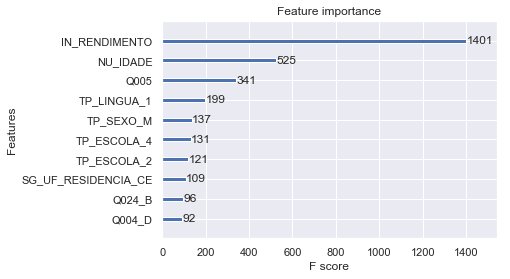

In [77]:
# Ranking das 10 variáveis mais importantes
plot_importance(model, max_num_features=10)
pyplot.show()

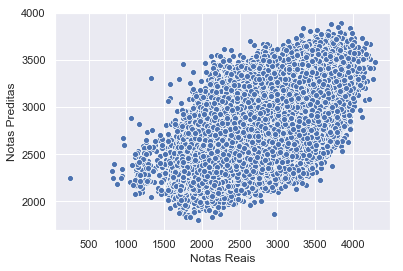

In [78]:
# Organizando os resultados em uma tabela
result = pd.DataFrame(data={'Notas Reais': y_test, 'Notas Preditas': y_predict})
result['diferenca'] = abs(result['Notas Reais'] - result['Notas Preditas'])

# Construindo gráfico de dispersão entre os valores reais e os valores preditos
sns.set()
ax = sns.scatterplot(x='Notas Reais', y='Notas Preditas', data=result)
ax